#### Lecture 8 - Root finding: Bracketing methods

C&C Example 5.3-5.5

Bisection and false position method on function:

$$v(t) = \frac{gm}{c}(1 - e^{-ct/m})$$

Given $m = 68.1$ kg, $t = 10$ s, $v(t) = 40$ m/s

- Solve for $c$ using initial bracket $[12, 16]$
- Plot $log(|f(x)|)$ vs. number of iterations $n$

In [1]:
import numpy as np

m = 68.1
t = 10
v = 40
g = 9.81

def f(c):
    return g*m/c * (1 - np.exp(-c*t/m)) - v  # set f(c) = 0

In [20]:
def bisection(f, xl, xu, tol=1e-8):
    
    # check for valid initial bracket
    assert f(xl) * f(xu) < 0, 'Choose xl,xu such that f(xl) * f(xu) < 0'
    err = 9999
    errors = [] # store errors to plot later
    
    while err > tol:
        xr = (xl + xu) / 2
        test = f(xl) * f(xr)
        if test < 0:
            xu = xr
        elif test > 0:
            xl = xr
        err = np.abs(f(xr))
        errors.append(err)
    
    return xr, errors

In [21]:
xr, errors_b = bisection(f, 12, 16)

print('Estimate of root: %0.4f' % xr)
print('Iterations: %d' % len(errors_b))

Estimate of root: 14.8011
Iterations: 28


The false position method will be the same except for the `xr` update:

In [22]:
def falseposition(f, xl, xu, tol=1e-8):
    
    # check for valid initial bracket
    assert f(xl) * f(xu) < 0, 'Choose xl,xu such that f(xl) * f(xu) < 0'
    err = 9999
    errors = [] # store errors to plot later
    
    while err > tol:
        xr = xu - f(xu) * (xl - xu) / (f(xl) - f(xu))
        test = f(xl) * f(xr)
        if test < 0:
            xu = xr
        elif test > 0:
            xl = xr
        err = np.abs(f(xr))
        errors.append(err)
    
    return xr, errors

In [26]:
xr, errors_f = falseposition(f, 12, 16)

print('Estimate of root: %0.4f' % xr)
print('Iterations: %d' % len(errors_f))

Estimate of root: 14.8011
Iterations: 9


The false position method converges faster for this problem. These implementations are not very robust. They should include a `maxiter` to catch cases where the iteration does not converge. We could have chosen a different stopping criteria based on the difference in `xr` values rather than the `f(xr)` value. Check root with scipy (docs [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.bisect.html)):

In [29]:
import scipy.optimize as sopt
sopt.bisect(f, 12, 16)

14.801135944990165

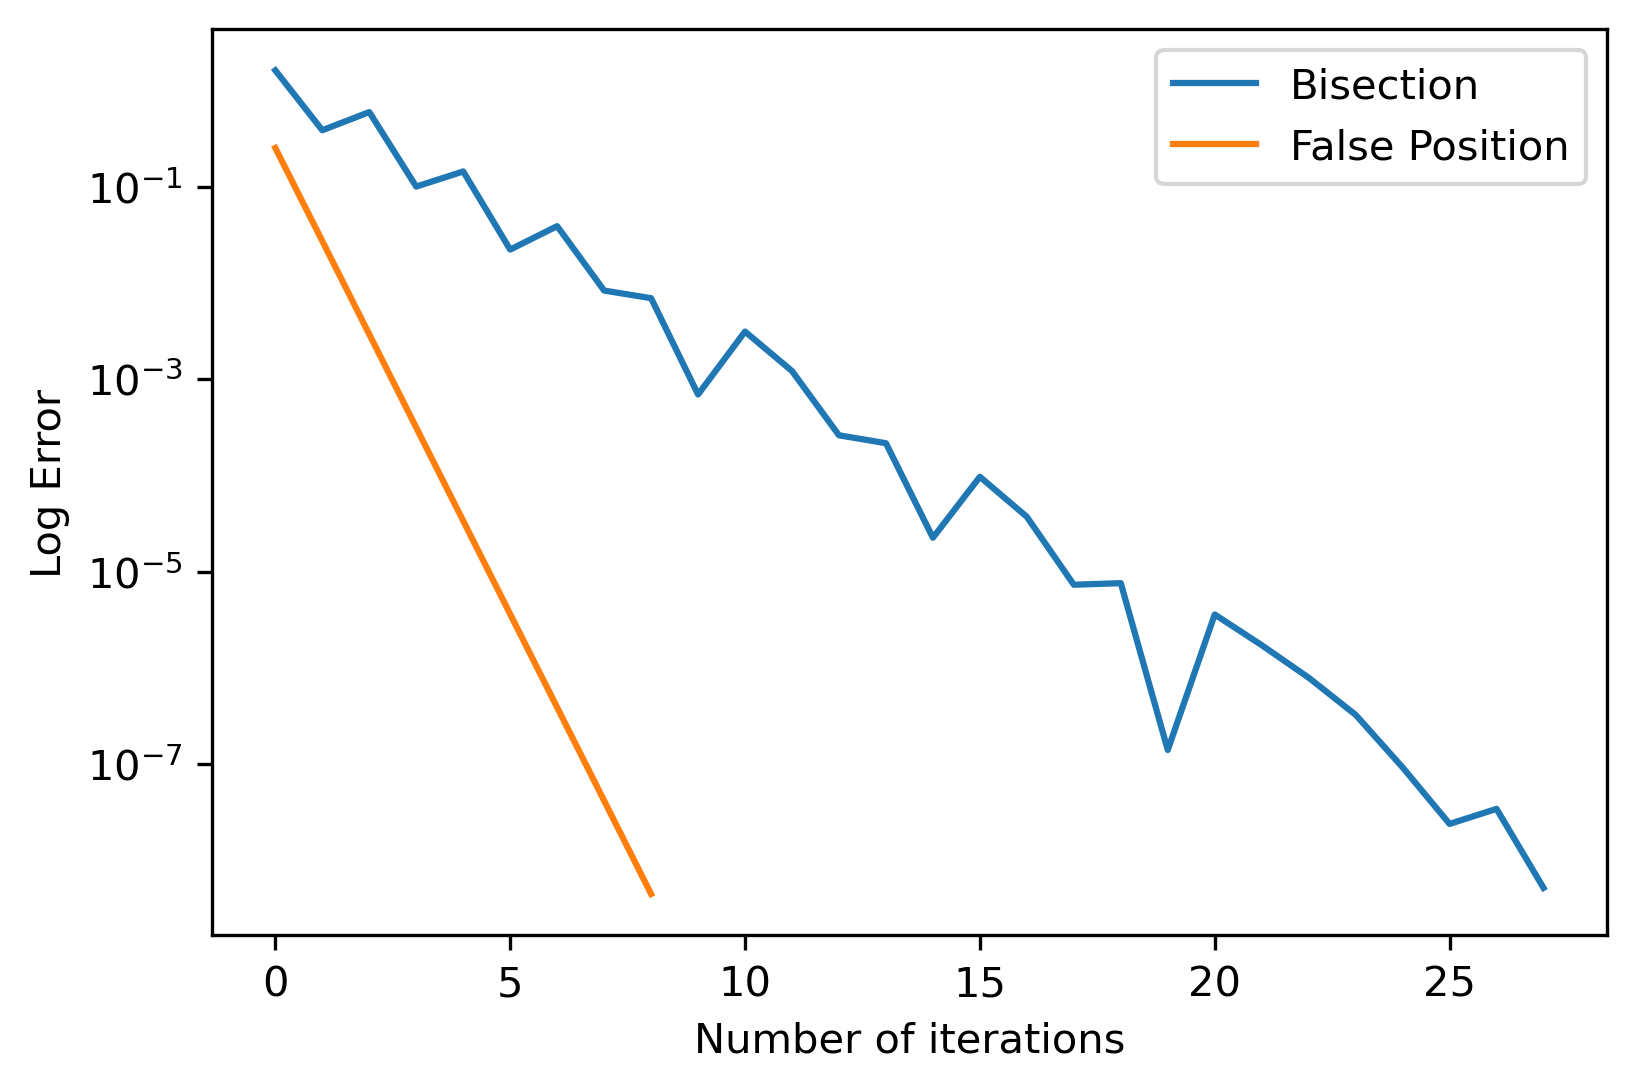

In [30]:
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 300
plt.semilogy(errors_b)
plt.semilogy(errors_f)
plt.ylabel('Log Error')
plt.xlabel('Number of iterations')
plt.legend(['Bisection', 'False Position'])
plt.show()

##### Case Study 8.2 C&C
Rain pH as a function of atmospheric CO2 concentration. Function defined below.

Solve using bisection with initial bracket $[10^{-12}, 10^{-2}]$

In [38]:
KH = 10**-1.46
K1 = 10**-6.3
K2 = 10**-10.3
Kw = 10**-14

# Partial pressure of CO2 (ppm)
# 1958: 315 ppm, 2003: 376 ppm, 2023: 423 ppm
pCO2 = 315

def f(H):
    return K1*KH*pCO2/(H*1e6) + 2*K2*K1*KH*pCO2/(H**2*1e6) + Kw/H - H

xr, errors_b = bisection(f, 1e-12, 1e-2)
    
print('Estimate of root: %0.5E' % xr)
print('Iterations: %d' % len(errors_b))
print('pH = %0.2f' % (-1*np.log10(xr)))


Estimate of root: 2.34604E-06
Iterations: 19
pH = 5.63


Using $p_{CO_2}=315$ ppm, we get `pH = 5.63`. Using the 2023 value $p_{CO_2}=423$ ppm, we get a lower value (more acidic), `pH = 5.57`.

If we try false position instead, it will be very slow to converge.
```python
xr, errors_f = falseposition(f, 1e-12, 1e-2)
```
Why? Let's look at the function over this bracket interval.

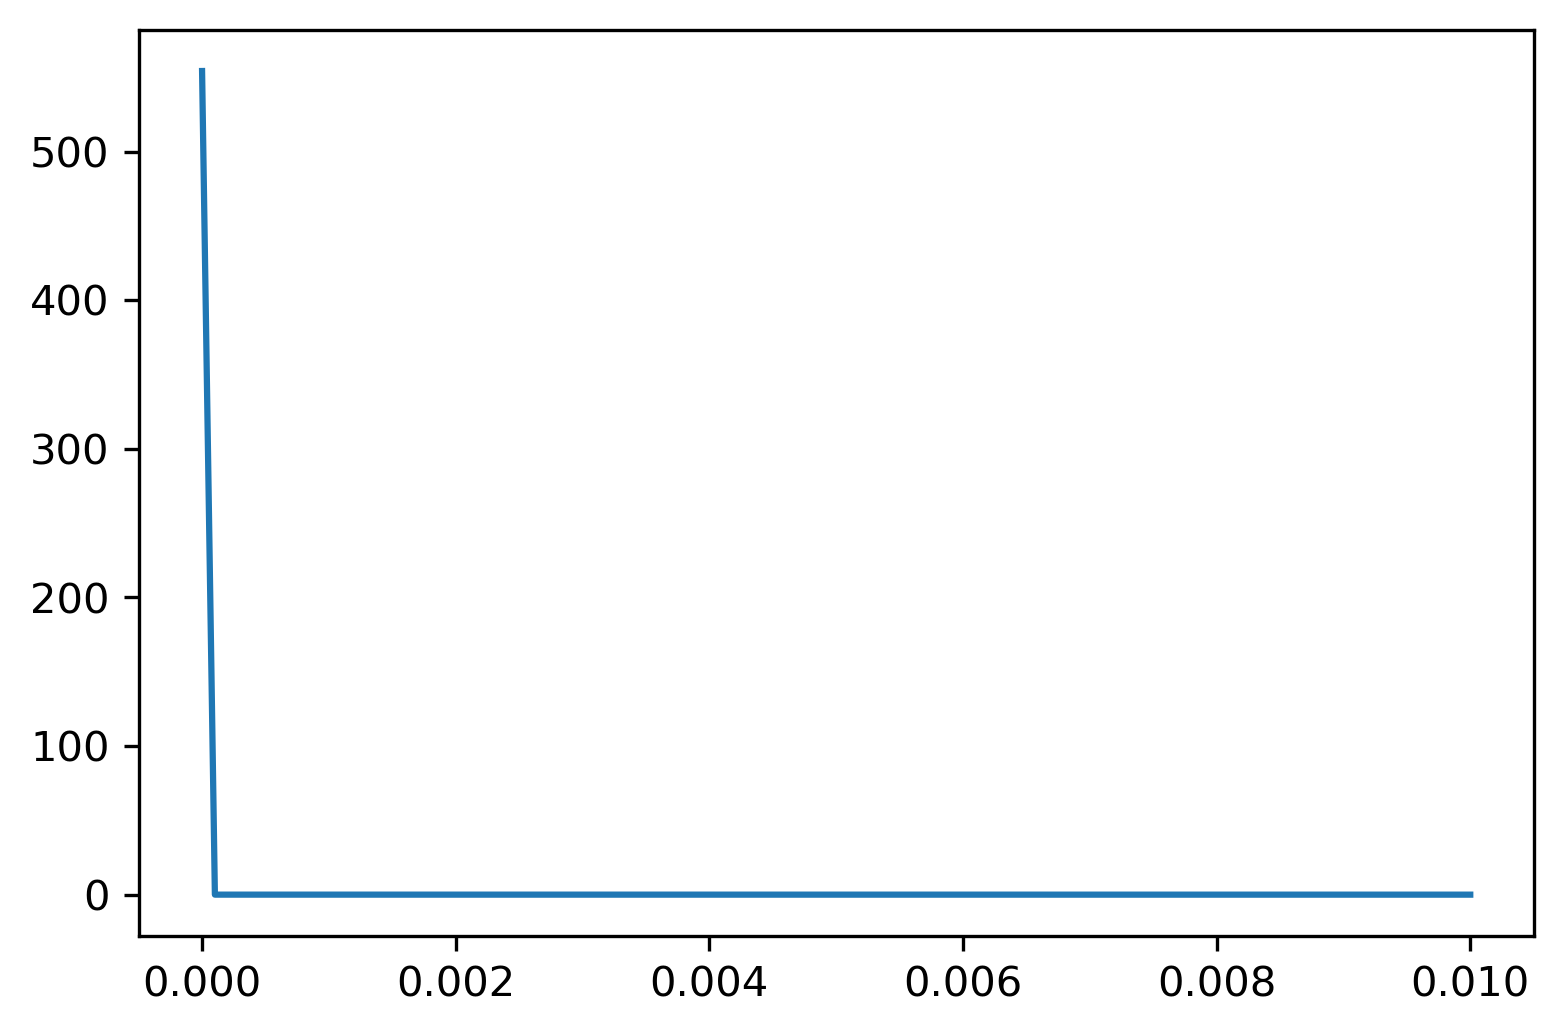

In [42]:
x = np.linspace(1e-12, 1e-2, 100)
y = f(x)
plt.plot(x,y)
plt.show()

The false position method assumes that the root is located near the side of the bracket with a function value closer to zero. However, that is not the case here: the root $~10^{-6}$ is much closer to $f(x_l)$. This will cause slow convergence for the false position method.